# Birthmark Cancer Classification
### Motivation:
This jupyter notebook shall provide an algorithm which detects skin cancer. The
objectives are pictures of birthmarks. These were downloaded from the world wide largest
skin image dataset on https://www.isic-archive.com/#!/topWithHeader/onlyHeaderTop/gallery?filter=%5B%5D.

### Importing the Data

In [157]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

benign_images = []
malignant_images = []

img_size = (300, 300)

for i in range(1,16):
    for ii in range(1,81):
        img_benign = Image.open('benign_'+str(i)+'/UDA-1/img'+str(ii)+'.jpg').convert('RGB')
        img_malignant = Image.open('malignant_'+str(i)+'/UDA-1/img'+str(ii)+'.jpg').convert('RGB')
        img_benign = img_benign.resize(img_size, Image.ANTIALIAS)
        img_malignant = img_malignant.resize(img_size, Image.ANTIALIAS)
        benign_images.append(np.asarray(img_benign))
        malignant_images.append(np.asarray(img_malignant))

### Preprocess Data

In [158]:
benign_images = np.array(benign_images)
malignant_images = np.array(malignant_images)

images = np.concatenate([benign_images, malignant_images])
labels = np.zeros(2400)
labels[1200:] = 1

In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split

model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu',input_shape=(300, 300, 3)),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(.3),
    Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(.3),
    Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(.3),
    Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(.3),
    Flatten(),
    Dense(200, activation='relu'),
    Dense(20, activation='relu'),
    Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130 (Conv2D)          (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 149, 149, 32)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 149, 149, 32)      128       
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 147, 147, 64)      18496     
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 145, 145, 64)      36928     
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 72, 72, 64)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 72, 72, 64)      

In [160]:
import tensorflow as tf

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
images = images.reshape((-1,300,300,3))

perm = np.random.permutation(2400)
images = images[perm,:,:,:]
labels = labels[perm]

train_images, test_images, train_labels, test_labels = train_test_split( images, labels, test_size=0.1)

history = model.fit(train_images, train_labels, epochs=50, batch_size=20, validation_data=(test_images, test_labels))


Epoch 1/50
108/108 [==============================] - 247s 2s/step - loss: 0.7530 - accuracy: 0.6166 - val_loss: 0.6991 - val_accuracy: 0.5417

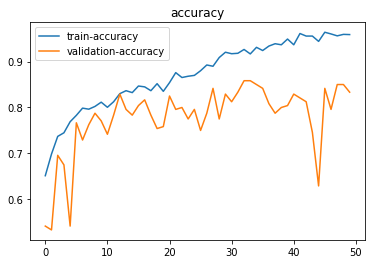

In [161]:
plt.figure()
plt.title('accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train-accuracy','validation-accuracy'])
plt.show()

### Save Model

In [162]:
model.save('model_deep_architecture.h5')

### Visualisation of test cases

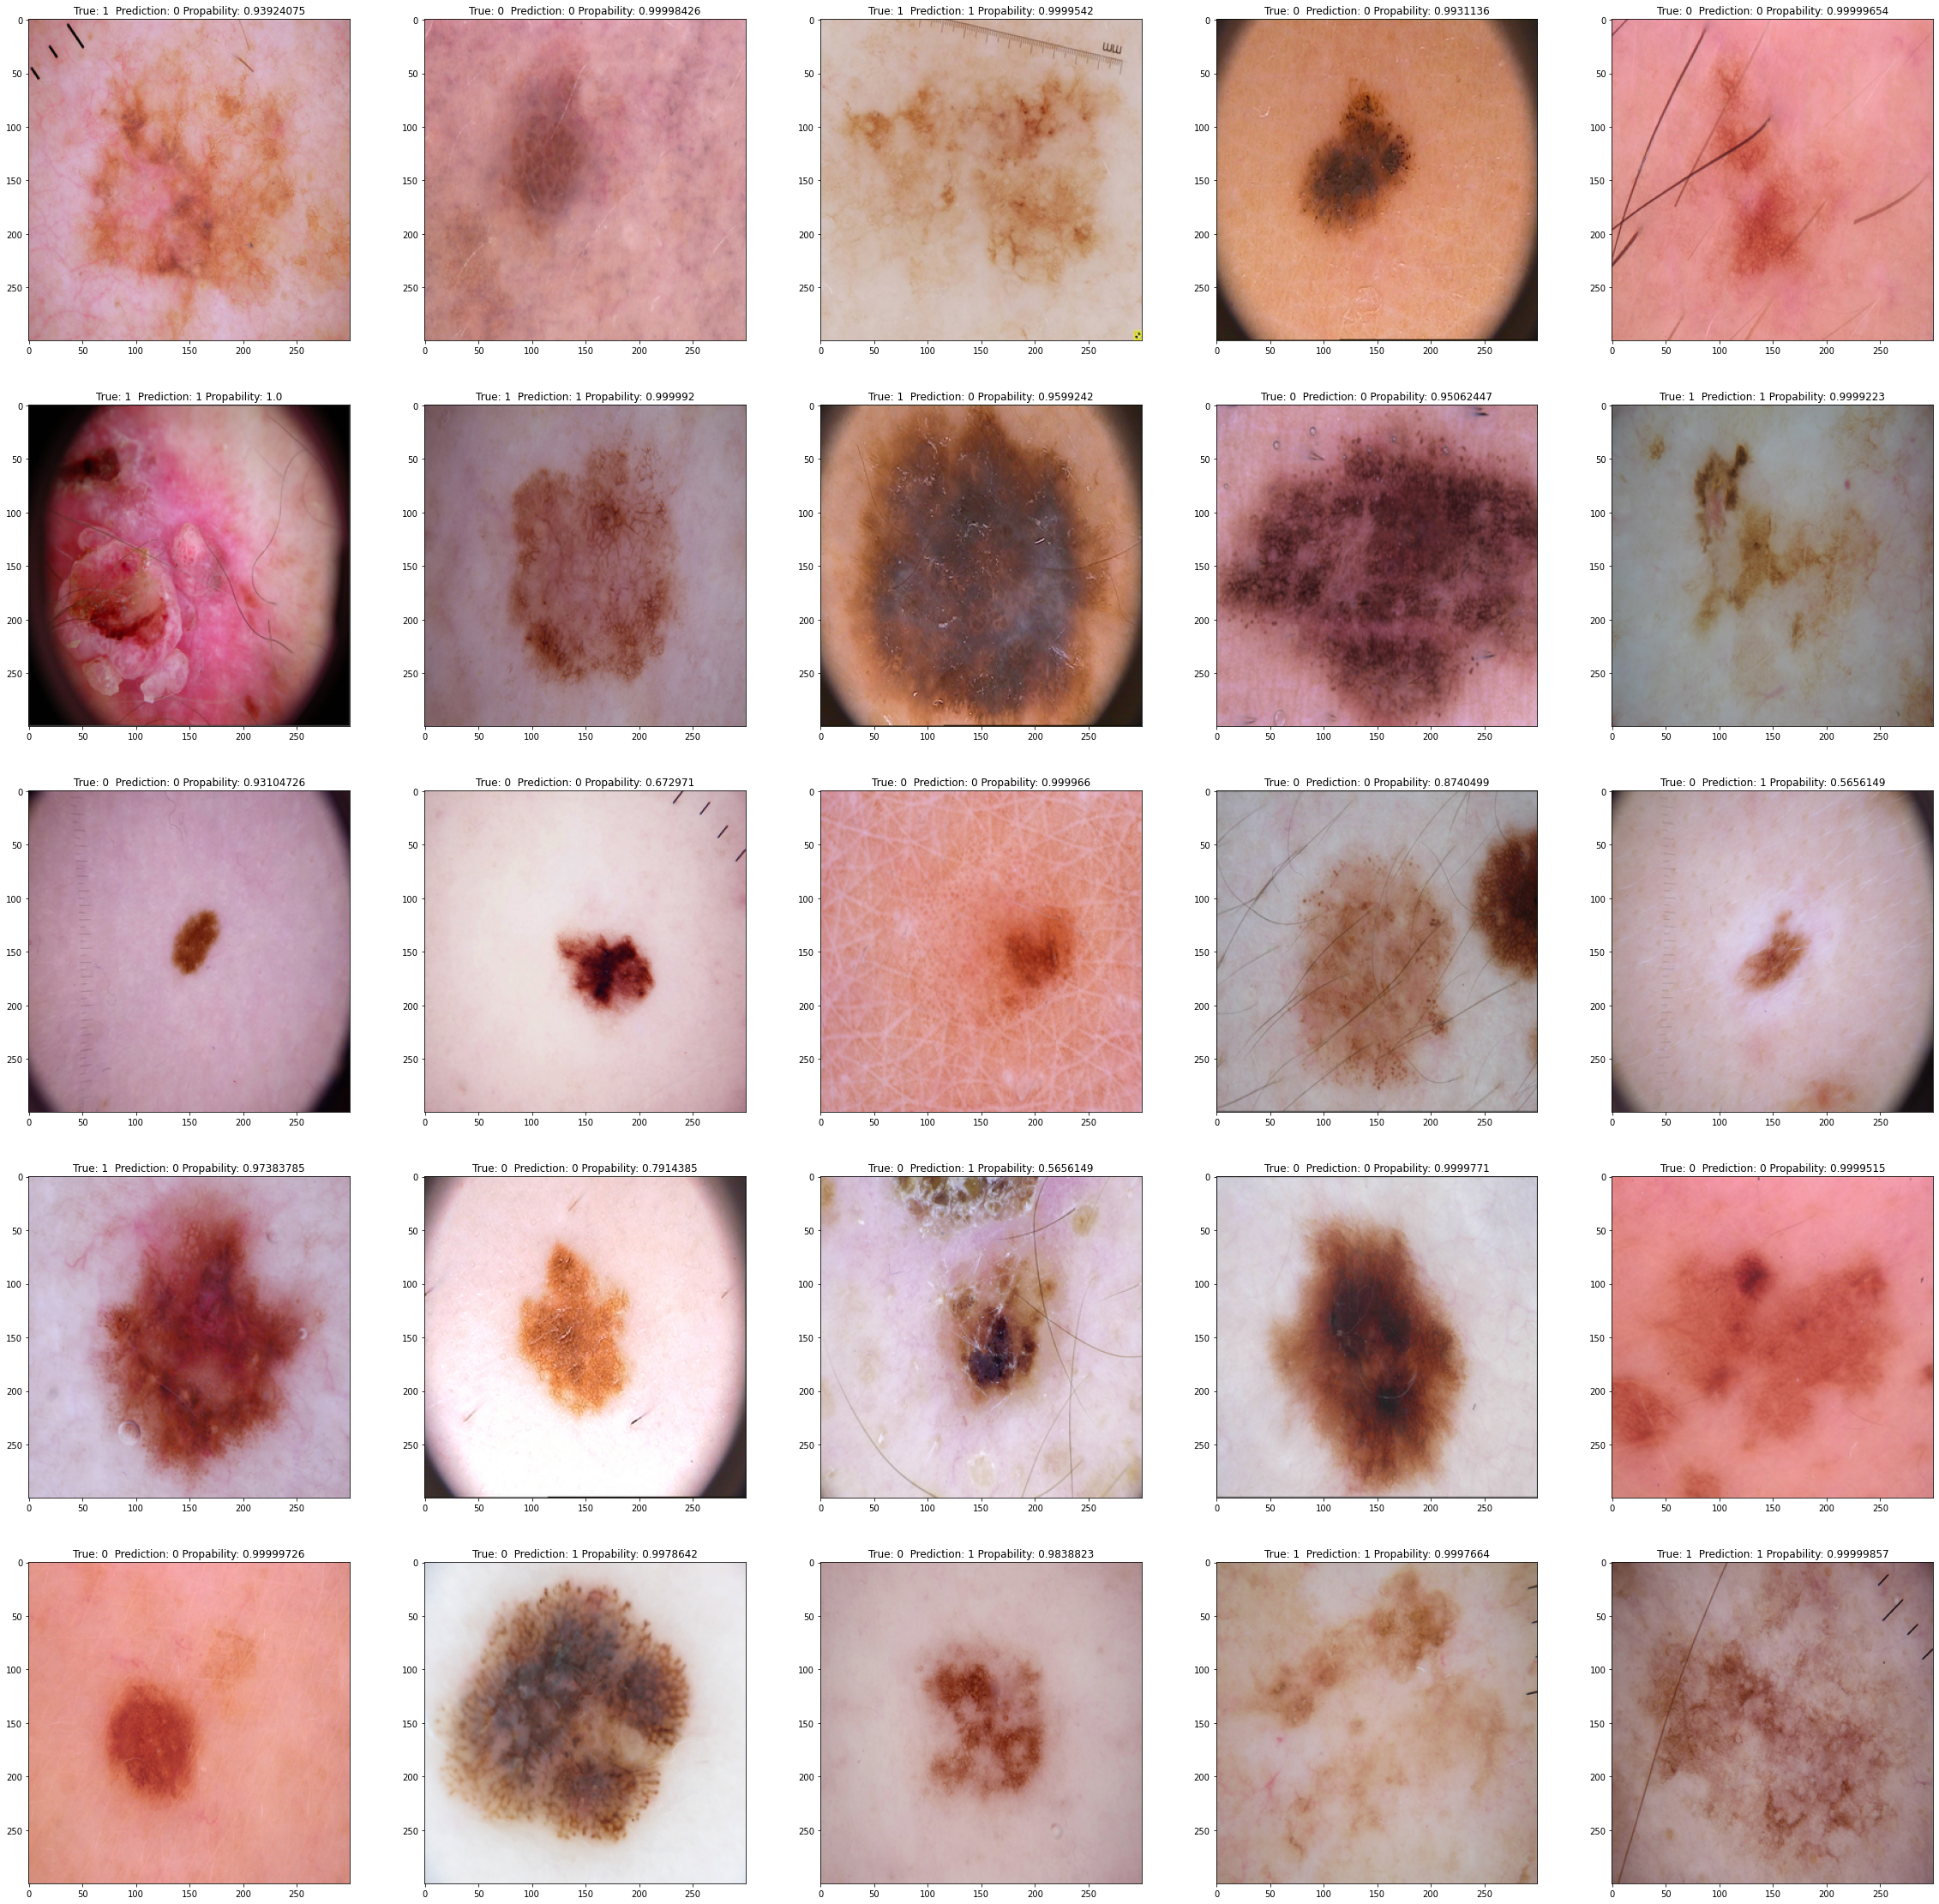

In [165]:
predict = model.predict(test_images)

plt.figure(figsize=(40,40))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_images[i,:,:,:].reshape(300,300,3))
    plt.title('True: '+str(int(test_labels[i]))+'  Prediction: '+str(np.argmax(predict[i,:]))+' Propability: '+str(np.max(predict[i,:])))

In [166]:
from sklearn.metrics import confusion_matrix

pred = np.zeros(len(predict))
for i in range(len(predict)):
    pred[i] = np.argmax(predict[i])

print('Confusion Matrix:')
print(confusion_matrix(test_labels,pred))

Confusion Matrix:
[[ 98  19]
 [ 21 102]]
